#### DEC7551-05655 (20232) - Tópicos Especiais I
#### Avaliação I (21/09/2023) 

In [190]:
import numpy as np
import pandas as pd
import os
from math import sqrt
import matplotlib.pyplot as plt
from numpy import NaN
plt.rc('figure', figsize=(10, 5))
import warnings
warnings.filterwarnings('ignore')

##### 1) Considerando duas listas, ou outra estrutura, que em cada posição das listas existirão valores numéricos positivos, elabore uma função para o cálculo do ângulo vetorial através da equação do cosseno, conforme equação abaixo (1,0):

A similaridade entre dois vetores não zerados pode ser calculado utilizando a medida do cosseno. A partir de dois vetores n-dimensionais, A e B, a similaridade do cosseno, cos(θ), é calculada utilizando o produto dos pontos dos dois vetores dividido pela multiplicação da norma desses vetores:<br> 
![cosine](cosine.png)

Ao final, apresente alguns exemplos de execução da função. O valor do cosseno deve ficar entre 0 e 1.

Obs: Será necessário importar a biblioteca math -> import math

In [191]:

import math

def angulo_vetorial(vetor1, vetor2):
    # Normalização dos vetores
    norma_vetor1 = np.linalg.norm(vetor1)
    norma_vetor2 = np.linalg.norm(vetor2)
    
    # Produto interno dos vetores normalizados
    produto_interno = np.dot(vetor1, vetor2)
    
    # Cálculo do ângulo em radianos
    angulo_radianos = np.cos(produto_interno / (norma_vetor1 * norma_vetor2))
    
    return angulo_radianos

#exemplo
vetor1 = np.array([1, 2, 3])
vetor2 = np.array([4, 5, 6])
angulo_vetorial(vetor1, vetor2)




0.5614727371106946

##### 2) Considerando o conjunto de arquivos disponibilizado para esta avaliação, presentes em diferentes diretórios, elabore um código em Python que realize a carga desses arquivos de maneira iterativa e ao final integre todos os arquivos em um DataFrame (1,0):

In [192]:


def csv_files(get_path = None):
    #Substitua path pela sua pasta onde estão os arquivos csv
    path = get_path
    list_paths = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                list_paths.append(os.path.join(root, file))

    # Criando um dataframe vazio
    df = pd.DataFrame()

    # Loop para carregar os arquivos csv
    for path in list_paths:
        df_temp = pd.read_csv(path, sep=";")
        df = pd.concat([df, df_temp], ignore_index=True)
    return df

df = csv_files("/workspaces/DataScience_class/atividades/Avaliação I-2023-2/Arquivos/Questão 2")
df.head()



,nome,id_inscricao,curso,graduacao_completa,especializacao_completa,mestrado_completo,trabalhos_eventos_nacionais,trabalhos_eventos_internacionais,artigos_sem_qualis,artigos_qualis_b5_c,...,tempo_docencia,nota_cv,area,tematica_1,tematica_2,tematica_3,tematica_4,tematica_5,nota_producao_bibliografica,nota_producao_tecnica_tecnologica
0,Candidato 5,2022-08626,Mestrado,Sim,Não,Não,0,1,0,0,...,0,"2,655652",Mídia do Conhecimento,temática 9,temática 13,temática 14,tematica 2,tematica 10,4,0
1,Candidato 1,2022-02929,Doutorado,Sim,Sim,Sim,1,2,0,0,...,1,"3,693548",Gestão do Conhecimento,temática 1,temática 2,temática 8,tematica 9,tematica 12,7,10
2,Candidato 4,2022-05828,Mestrado,Sim,Sim,Não,1,0,0,0,...,0,"2,128293",Gestão do Conhecimento,temática 1,temática 3,temática 5,tematica 6,tematica 9,2,5
3,Candidato 3,2022-19282,Doutorado,Sim,Sim,Sim,0,0,0,1,...,1,"2,930399",Engenharia do Conhecimento,temática 10,temática 11,temática 15,tematica 18,tematica 19,0,6
4,Candidato 6,2022-28322,Mestrado,Sim,Sim,Não,0,2,0,0,...,0,"2,893722",Engenharia do Conhecimento,temática 10,temática 11,temática 16,tematica 17,tematica 18,4,2


##### 3) Considerando as colunas abaixo calcule a similaridade vetorial entre todos os pares distintos de candidatos usando a função elaborada na questão 1. O resultado deve ser armazenado em um dataframe. Na sequência, para cada linha que representa um candidato, apresente o candidato mais similar com a respectiva similaridade excluindo-se o candidato de origem (1,5):

1 - trabalhos_eventos_nacionais<br>
2 - trabalhos_eventos_internacionais<br>
3 - artigos_sem_qualis<br>
4 - artigos_qualis_b5_c<br>
5 - artigos_qualis_b3_b4<br>
6 - artigos_qualis_b1_b2<br>
7 - artigos_qualis_a1_a2<br>
8 - livros_publicados<br>
9 - capitulos_livros<br>
10 - livros_organizados<br>
11 - participacao_projeto_pesquisa<br>
12 - coordenacao_projeto_pesquisa<br>
13 - software_produto_sem_registro<br>
14 - software_produto_com_registro 

In [193]:
from itertools import combinations
data = csv_files("/workspaces/DataScience_class/atividades/Avaliação I-2023-2/Arquivos/Questão 2")
df = pd.DataFrame(data)



# Lista de colunas para o cálculo de similaridade
colunas = ['trabalhos_eventos_nacionais', 'trabalhos_eventos_internacionais',
           'artigos_sem_qualis', 'artigos_qualis_b5_c', 'artigos_qualis_b3_b4',
           'artigos_qualis_b1_b2', 'artigos_qualis_a1_a2', 'livros_publicados',
           'capitulos_livros', 'livros_organizados', 'participacao_projeto_pesquisa',
           'coordenacao_projeto_pesquisa', 'software_produto_sem_registro',
           'software_produto_com_registro']

# Crie um DataFrame vazio para armazenar os resultados de similaridade
resultados = []

# Loop para calcular a similaridade entre todos os pares distintos de candidatos
combinacoes = list(combinations(df['nome'], 2))
for c1, c2 in combinacoes:
    candidato1 = df[df['nome'] == c1][colunas].any().values[0]
    candidato2 = df[df['nome'] == c2][colunas].any().values[0]
    similaridade = angulo_vetorial([candidato1], [candidato2])
    resultados.append({'Candidato1': c1, 'Candidato2': c2, 'Similaridade': similaridade})

# Crie um DataFrame com os resultados
resultados_df = pd.DataFrame(resultados)

# Exiba os resultados
resultados_df




,Candidato1,Candidato2,Similaridade
0,Candidato 5,Candidato 1,NaN
1,Candidato 5,Candidato 4,NaN
2,Candidato 5,Candidato 3,NaN
3,Candidato 5,Candidato 6,NaN
4,Candidato 5,Candidato 2,NaN
5,Candidato 1,Candidato 4,0.540302
6,Candidato 1,Candidato 3,NaN
7,Candidato 1,Candidato 6,NaN
8,Candidato 1,Candidato 2,0.540302
9,Candidato 4,Candidato 3,NaN


##### 4) Considerando os dados carregados no DataFrame da questão 2 crie uma nova coluna em que o valor deve ser calculado com base na seguinte equação (1,0):

media_final = ((nota_cv / máxima nota por curso * 10) * 0,4) + (nota_producao_bibliografica * 0,4) + (nota_producao_tecnica_tecnologica * 0,2) 

##### Considerando a nova coluna (media_final) apresente uma lista ordenada por curso e média final em ordem descresente contendo o nome do candidato, o curso, a área e a média final. O resultado deve também ser salvo em um arquivo no formato CSV.

In [5]:
df_in = csv_files("/workspaces/DataScience_class/atividades/Avaliação I-2023-2/Arquivos/Questão 2")
#media_final = ((nota_cv / máxima nota por curso * 10) * 0,4) + (nota_producao_bibliografica * 0,4) + (nota_producao_tecnica_tecnologica * 0,2) nova coluna com a media final no dataframe

#funcao que calcula a media final de cada candidato
def media_final(df_input):
    #converte a coluna nota_cv , para .
    df_input['nota_cv'] = df_input['nota_cv'].str.replace(',', '.')
    #converte a coluna nota_cv para float
    df_input['nota_cv'] = df_input['nota_cv'].astype(float)
    #cria a coluna media_final
    df_input['media_final'] = 0
    #calcula a media final
    df_input['media_final'] = ((df_input['nota_cv'] / df_input['nota_cv'].max() * 10) * 0.4) + (df_input['nota_producao_bibliografica'] * 0.4) + (df_input['nota_producao_tecnica_tecnologica'] * 0.2)
    return df_input

#funcao que ordena a lista de candidatos por curso e media final
def lista_ordenada(df_input):
    df_input = media_final(df_input)
    df_input = df_input.sort_values(by=['media_final','curso'], ascending=False)
    df_input = df_input[['nome', 'curso', 'area', 'media_final']]
    return df_input

lista_ordenada(df_in)



,nome,curso,area,media_final
1,Candidato 1,Doutorado,Gestão do Conhecimento,8.384027
5,Candidato 2,Doutorado,Mídia do Conhecimento,7.200000
4,Candidato 6,Mestrado,Engenharia do Conhecimento,4.807918
0,Candidato 5,Mestrado,Mídia do Conhecimento,4.176907
3,Candidato 3,Doutorado,Engenharia do Conhecimento,4.043507
2,Candidato 4,Mestrado,Gestão do Conhecimento,3.865185


##### 5) Considerando os dados carregados no DataFrame da questão 2 crie duas análises. A primeira, agregando (realizando a soma ou média) por curso os dados da coluna "media_final". A segunda,  utilizando o conceito de tabela de pivoteamento com função de agregação de soma em que nas linhas deve constar a coluna "curso" e nas colunas deve constar a coluna "area". Para cada uma das análise apresente também gráficos de barras ou linhas (1,0).   

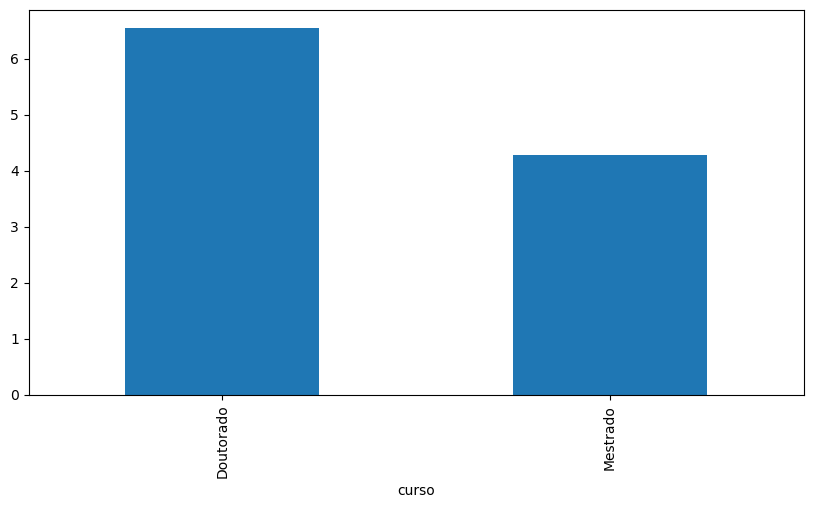

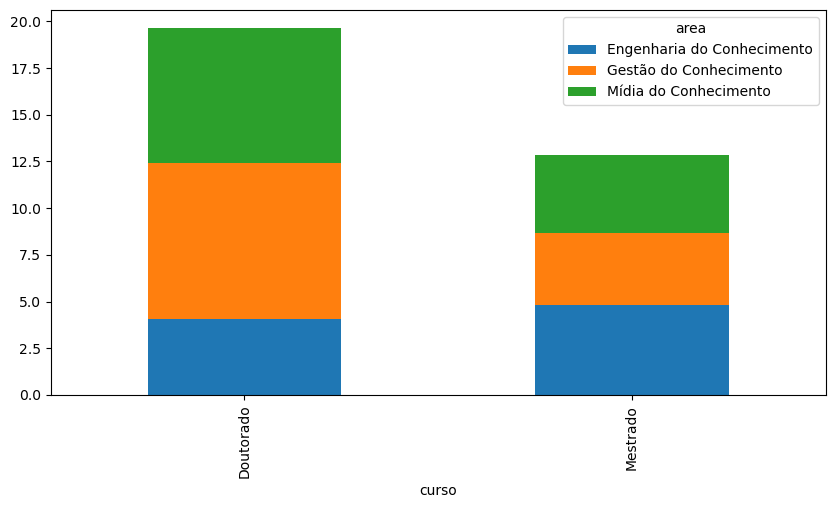

area,Engenharia do Conhecimento,Gestão do Conhecimento,Mídia do Conhecimento
curso,,,
Doutorado,4.043507,8.384027,7.200000
Mestrado,4.807918,3.865185,4.176907


In [6]:
df_in = csv_files("/workspaces/DataScience_class/atividades/Avaliação I-2023-2/Arquivos/Questão 2")

#media por curso da coluna media_final 
def media_curso(df_input):
    df_input = media_final(df_input)
    df_input = df_input.groupby('curso')['media_final'].mean()
    return df_input

#mostra os dados graficamente
def grafico_media_curso(df_input):
    df_input = media_curso(df_input)
    df_input.plot.bar()
    plt.show()
    return df_input    

grafico_media_curso(df_in)

#media por area da coluna media_final
def grafico_barras(df_input):
    pivot_df = df_input.pivot_table(index='curso', columns='area', values='media_final', aggfunc='sum')
    pivot_df.plot(kind='bar', stacked=True)
    plt.show()
    return pivot_df

grafico_barras(df_in)

##### 6) Considerando o DataFrame da questão 2 agrege os dados das colunas tematica_1, tematica_2, tematica_3, tematica_4, tematica_5 por meio de uma contagem, de modo que, ao final, seja produzido um histograma ordenado pela frequência em ordem decrescente. Apresente as 7 temáticas mais frequentes na tela e também na forma de um gráfico de barras (1,5).

Exempo:

Temática 2 - 3<br>
Temática 4 - 2<br>
Temática 5 - 2<br>
....

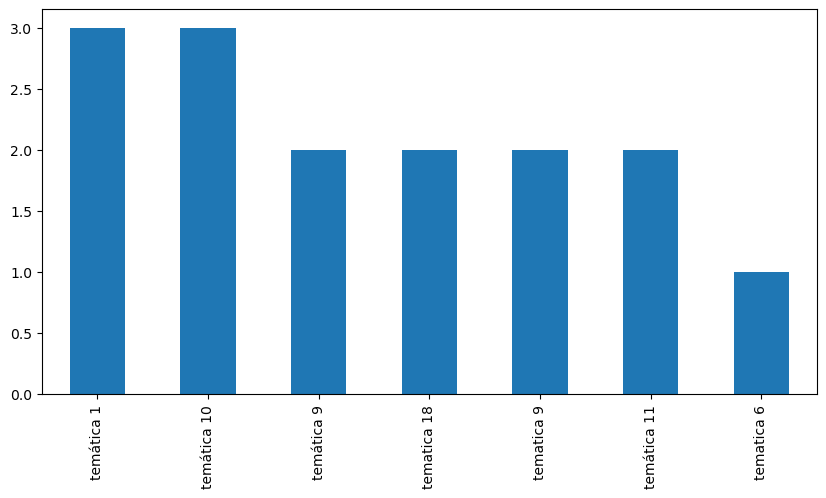

temática 1     3
temática 10    3
temática 9     2
tematica 18    2
tematica 9     2
temática 11    2
tematica 6     1
Name: count, dtype: int64

In [7]:

df_in = csv_files("/workspaces/DataScience_class/atividades/Avaliação I-2023-2/Arquivos/Questão 2")

#funcao que conta a frequencia de cada tema
def frequencia_tema(df_input):
    df_input = df_input[['tematica_1', 'tematica_2', 'tematica_3', 'tematica_4', 'tematica_5']]
    df_input = df_input.stack().value_counts()
    return df_input

#funcao que mostra os  temas mais frequentes 
def sete_temas(df_input):
    df_input = frequencia_tema(df_input)
    df_input = df_input.head(7)
    return df_input

#funcao que mostra os temas mais frequentes em um grafico de barras
def grafico_sete_temas(df_input):
    df_input = sete_temas(df_input)
    df_input.plot.bar()
    plt.show()
    return df_input

grafico_sete_temas(df_in)



##### 7) Carregue o arquivo movie.csv. Após isso, para cada valor distinto na coluna genres (que devem ser separados cada vez que o caracter | ocorre) gere novas colunas e incorpore ao conjunto original atribuíndo 1. Após isso recupere o conteúdo de um intervalo de linhas do conjunto de dados (1,0).

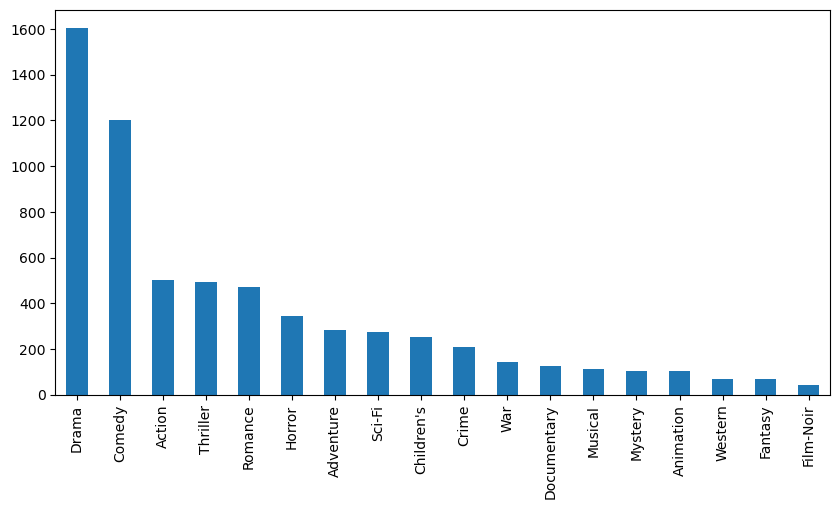

,ID,Nome,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Retirei as virgulas e uns ponto e virgula que tinha no arquivo csv para poder ler o arquivo sem erros

colunas = ['ID', 'Nome', 'genres']
df_movies = pd.read_csv("/workspaces/DataScience_class/atividades/Avaliação I-2023-2/Arquivos/Questão 7/movie.csv", sep=";", names=colunas)

#funcao que separa os generos e cria uma coluna para cada genero
def separa_generos(df_input):
    df_input = df_input['genres'].str.get_dummies('|')
    df_input = pd.concat([df_movies, df_input], axis=1)
    return df_input


plt.rc('figure', figsize=(10, 5))
#funcao que mostra a quantidade de filmes por genero
def filmes_por_genero(df_input):
    df_input = separa_generos(df_input)
    df_input = df_input.iloc[:, 3:].sum().sort_values(ascending=False)
    df_input.plot.bar()
    plt.show()
    return df_input

filmes_por_genero(df_movies)


#funcao que mostra dados de algumas linhas
def mostra_dados(df_input):
    df_input = df_input.head(5)
    return df_input

tratado = separa_generos(df_movies)
mostra_dados(tratado)





##### 8) Considerado o conjunto tae.csv e as bibliotecas em Python apresentadas na disciplina, elabore uma árvore de decisão. Após isso reduza a profundidade da árvore. Apresente a acurácia inicial e após a redução da profundidade. Analisando a árvore gerada apresente/escreva duas regras. O conjunto de dados representa avaliações de desempenho no ensino ao longo de alguns semestres e possui as colunas 'ta_native', 'course_instr', 'course', 'summer_regular', 'class_size' e 'label'. A coluna ‘label’ representa o atributo meta, ou seja, o objetivo da classificação (1,0). 

Acuracia original: 0.5869565217391305
Acuracia com reducao da arvore: 0.5217391304347826
|--- course <= 5.50
|   |--- ta_native <= 1.50
|   |   |--- class_size <= 35.50
|   |   |   |--- class: 3
|   |   |--- class_size >  35.50
|   |   |   |--- class_size <= 43.50
|   |   |   |   |--- class: 1
|   |   |   |--- class_size >  43.50
|   |   |   |   |--- class: 3
|   |--- ta_native >  1.50
|   |   |--- summer_regular <= 1.50
|   |   |   |--- class_size <= 10.50
|   |   |   |   |--- class: 2
|   |   |   |--- class_size >  10.50
|   |   |   |   |--- course_instr <= 19.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- course_instr >  19.00
|   |   |   |   |   |--- class: 3
|   |   |--- summer_regular >  1.50
|   |   |   |--- class_size <= 19.50
|   |   |   |   |--- class: 1
|   |   |   |--- class_size >  19.50
|   |   |   |   |--- class_size <= 25.50
|   |   |   |   |   |--- course <= 4.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- course >  4.00
|   |   |   |   | 

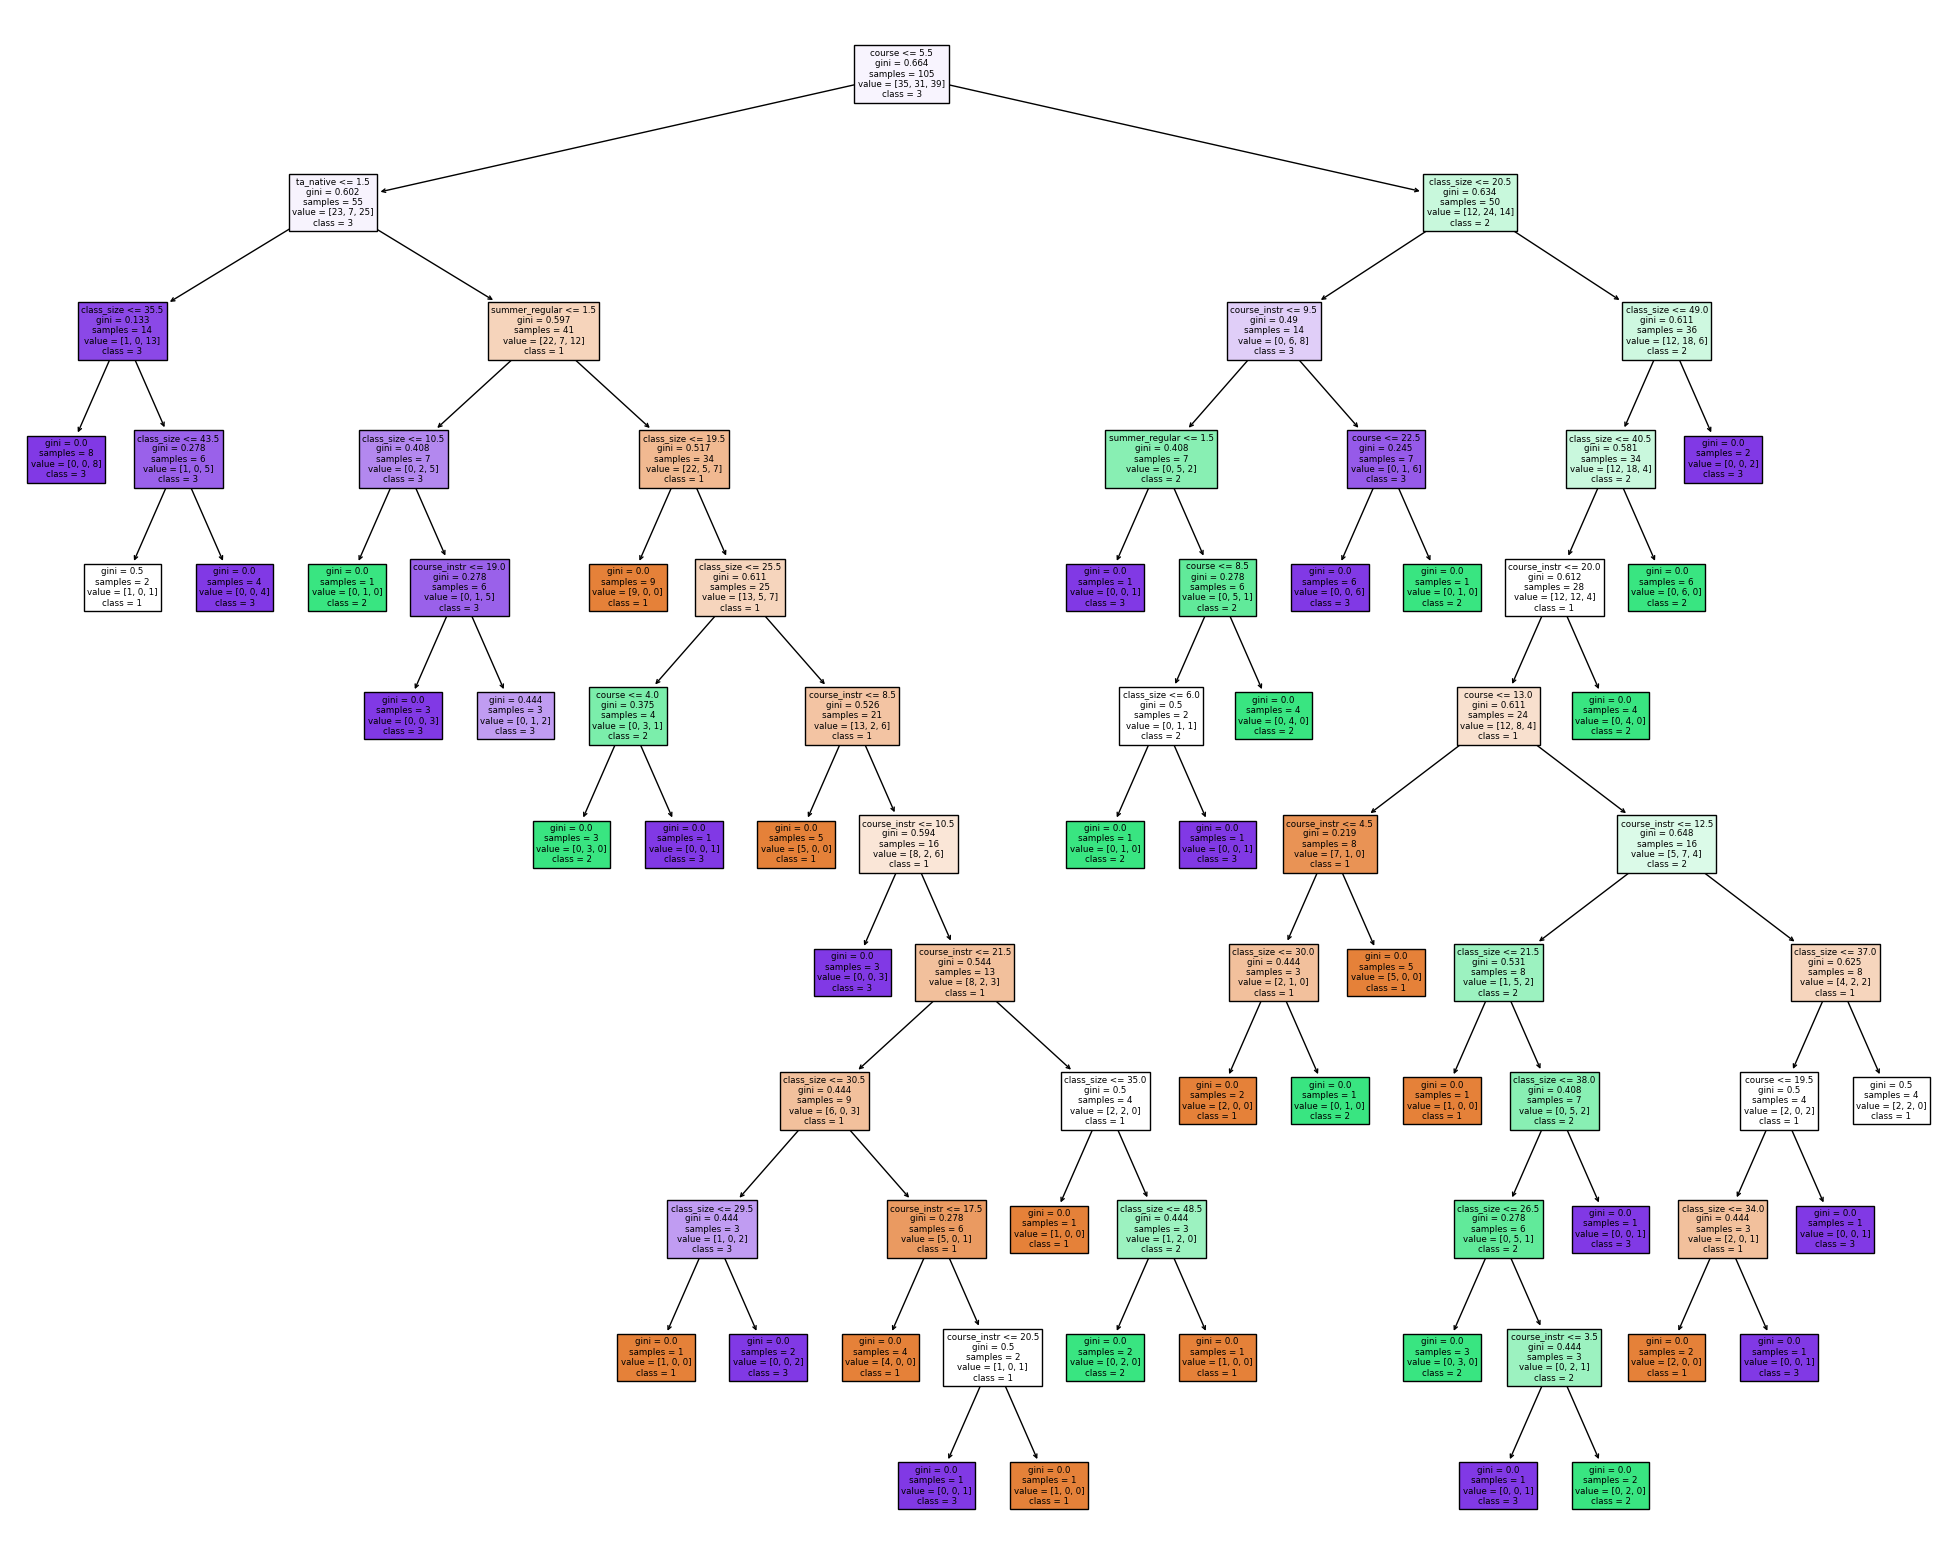

In [9]:
# Carrega as bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # importa o Decision Tree Classifier
from sklearn.model_selection import train_test_split # importa o método train_test_split 
from sklearn import metrics #importa as métricas de avaliação de modelos do scikit-learn
colunas = ['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size', 'label']
data = pd.read_csv("/workspaces/DataScience_class/atividades/Avaliação I-2023-2/Arquivos/Questão 8/tae.csv", sep=",", names=colunas)
data.head()

#separa os dados em atributos e variavel meta
X = data[['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size']]
y = data['label']

#separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#cria o classificador
clf = DecisionTreeClassifier()

#treina o classificador

clf = clf.fit(X_train,y_train)

#faz a predicao

y_pred = clf.predict(X_test)

#verifica a acuracia

print("Acuracia original:",metrics.accuracy_score(y_test, y_pred))

#reduzindo a profundidade da arvore
clf2 = DecisionTreeClassifier(max_depth=3)
clf2 = clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
print("Acuracia com reducao da arvore:",metrics.accuracy_score(y_test, y_pred))


#mostra as arvores
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size'],  
                   class_names=['1', '2', '3', '4', '5'],
                   filled=True)
#regras
from sklearn.tree import export_text
r = export_text(clf, feature_names=['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size'])
print(r)
print('\n')
r2 = export_text(clf, feature_names=['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size'], decimals=0)
print(r2)





##### 9) Utilizando o conjunto de dados (wine.csv) e as bibliotecas em Python apresentadas na disciplina, elabore um algoritmo de aprendizado de máquina do tipo Random Forest. Apresenta a acurácia inicial do modelo. Na sequência calcule a contribuição de cada característica e realize novamente o treinamento e o teste sem algumas das características menos importantes, apresentando no final a nova acurácia (1,0). 

Acuracia original: 0.9629629629629629


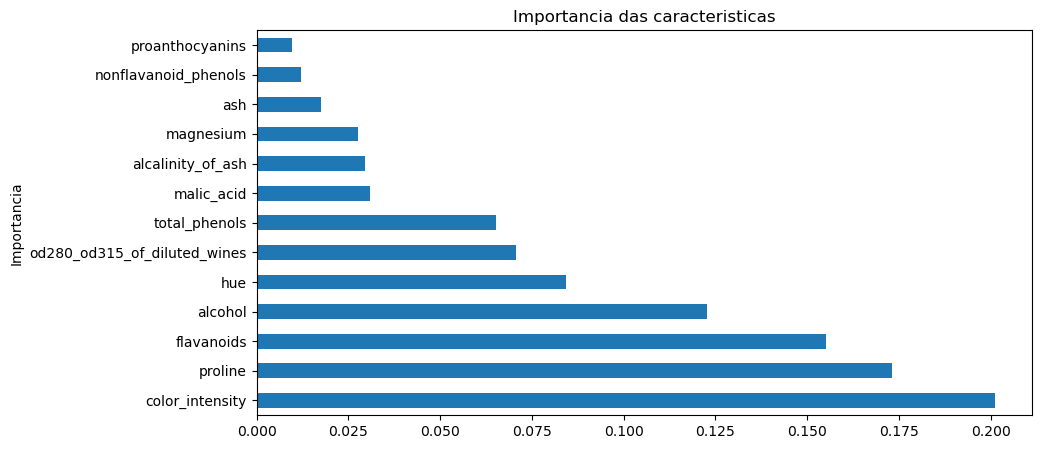

Acuracia sem as caracteristicas menos importantes: 1.0


In [33]:
# Carrega as bibliotecas
from sklearn.ensemble import RandomForestClassifier

colunas = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline']
data = pd.read_csv("/workspaces/DataScience_class/atividades/Avaliação I-2023-2/Arquivos/Questão 9/wine.csv", sep=",", names=colunas)
data.head()

#separa os dados em atributos e variavel meta
X = data[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols','flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline']]
y = data['class']

#separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#cria o classificador
clf = RandomForestClassifier(n_estimators=100)

#treina o classificador

clf = clf.fit(X_train,y_train)

#faz a predicao

y_pred = clf.predict(X_test)

#verifica a acuracia

print("Acuracia original:",metrics.accuracy_score(y_test, y_pred))

#mostra a importancia de cada caracteristica
feature_imp = pd.Series(clf.feature_importances_,index=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols','flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline']).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Importancia das caracteristicas")
plt.ylabel("Importancia")
plt.xlabel("Caracteristica")
feature_imp.plot(kind='barh')
plt.show()


#remove as caracteristicas menos importantes
X = data[['alcohol', 'malic_acid',  'magnesium', 'total_phenols','flavanoids','proanthocyanins', 'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline']]
y = data['class']

#separa os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#cria o classificador

clf = RandomForestClassifier(n_estimators=100)

#treina o classificador

clf = clf.fit(X_train,y_train)

#faz a predicao

y_pred = clf.predict(X_test)

#verifica a acuracia

print("Acuracia sem as caracteristicas menos importantes:",metrics.accuracy_score(y_test, y_pred))







##### 10) Questão adicional - Utilizando alguma API obtenha dados de fontes que contenham dados abertos, tais como, redes sociais ou web sites. A partir disso, realize as devidas transformações para que os dados coletados sejam estruturados em um DataFrame do Pandas. Com os dados estruturados utilize alguma função de agregação (soma, média, contagem) projetando o resultado por meio de algum gráfico (1,0). Obs: recupere somente dados que estejam disponíveis por meio da API utilizada. 

         cases  deaths  recovered
1/22/20    557      17         30
1/23/20    657      18         32
1/24/20    944      26         39
1/25/20   1437      42         42
1/26/20   2120      56         56


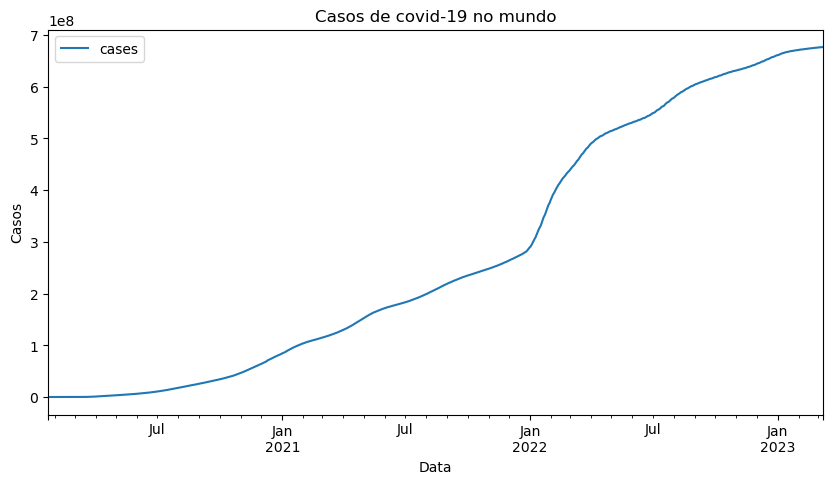

(1143, 4)

In [115]:
# Carrega as bibliotecas
import requests

#chamada api
def chamada_api():
    url = "https://disease.sh/v3/covid-19/historical/all?lastdays=all" #API que retorna os dados da covid-19 aberta para consulta
    response = requests.get(url)
    response = response.json()
    df = pd.DataFrame(response)
    return df

#cria uma coluna de data com o dado da coluna index que esta em formato de data
def cria_coluna_data(df_input):
    df_input['data'] = df_input.index
    #converte a coluna data de string para datetime mm/dd/aa
    df_input['data'] = pd.to_datetime(df_input['data'], format='%m/%d/%y')   
    return df_input


#mostra os dados graficamente
def grafico(df_input):
    df_input = cria_coluna_data(df_input)
    df_input.plot(x='data', y='cases')
    plt.title('Casos de covid-19 no mundo')
    plt.xlabel('Data')
    plt.ylabel('Casos')
    plt.show()
    
df = chamada_api()
print(df.head())
#chama o tratamento para data e mostra os dados graficamente
df = cria_coluna_data(df)
grafico(df)
df.shape


